In [1]:
# Crypto Currencies in the same group have >0.9 corelation
# group 1
# AAVE UNISWAP SUSHI COMPOUND

# group 2
# CURVE, 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/caleb/Documents/tmp/ssa/discordDeFiScrape700.csv",encoding = "ISO-8859-1")

In [4]:
df.head()

,messageID,author_id,author_username,content,timestamp,serverName,channelName,date,time
0,9.495640e+17,1.355640e+17,Zapacheenie,Gas mighty cheap right now,5/3/2022 3:09:44 pm,SushiSwap Community,Price Talk,5/3/2022,3:09:44 PM
1,9.495640e+17,1.355640e+17,Zapacheenie,Learn'd and shided,5/3/2022 3:09:37 pm,SushiSwap Community,Price Talk,5/3/2022,3:09:37 PM
2,9.495090e+17,3.264530e+17,terrarekt,https://tenor.com/view/the-more-you-learn-and-...,5/3/2022 11:30:35 am,SushiSwap Community,Price Talk,5/3/2022,11:30:35 AM
3,9.494940e+17,2.850350e+17,ChronoFury,"bots don't care about fundamentals, they just ...",5/3/2022 10:31:49 am,SushiSwap Community,Price Talk,5/3/2022,10:31:49 AM
4,9.494920e+17,7.884360e+17,WT Wizard,I was thinking same thing. Didn't know if I wa...,5/3/2022 10:23:36 am,SushiSwap Community,Price Talk,5/3/2022,10:23:36 AM


In [25]:
df['time']

0          3:09:44 PM
1          3:09:37 PM
2         11:30:35 AM
3         10:31:49 AM
4         10:23:36 AM
             ...     
585309    10:08:48 AM
585310    10:08:25 AM
585311    10:06:47 AM
585312    10:06:24 AM
585313    10:06:04 AM
Name: time, Length: 585314, dtype: object

In [5]:
#filling na with forward fill. 
df = df.fillna(method='ffill')

In [6]:
# Preparing Text Data for Sentimental Analysis

import numpy as np
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')

def clean_content(contentInput):
    if type(contentInput) == np.float:
        return ""
    contentInput = contentInput.lower()
    contentInput = re.sub("'", "", contentInput) # to avoid removing contractions in english
    contentInput = re.sub("@[A-Za-z0-9_]+","", contentInput)
    contentInput = re.sub("#[A-Za-z0-9_]+","", contentInput)
    contentInput = re.sub(r'http\S+', '', contentInput)
    contentInput = re.sub('[()!?]', ' ', contentInput)
    contentInput = re.sub('\[.*?\]',' ', contentInput)
    contentInput = re.sub("[^a-z0-9]"," ", contentInput)
    contentInput = contentInput.strip()
    contentInput = contentInput.split()
    contentInput = [w for w in contentInput if not w in stop]
    contentInput = " ".join(word for word in contentInput)
    return contentInput

In [7]:
#spliting data into months as for time series sentimental analysis
#Geting start and end date of data
monthList = pd.date_range('2021-01-01','2022-02-01', 
              freq='MS').strftime("%m/%Y").tolist()

#creating blank dict for later

timeSplitDataGroup1={}
timeSplitDataSentimentGroup1 = {}

timeSplitDataGroup2={}
timeSplitDataSentimentGroup2 = {}

for month in monthList: 
    timeSplitDataGroup1[month] = []
    timeSplitDataSentimentGroup1[month] = []    
    timeSplitDataGroup2[month] = []
    timeSplitDataSentimentGroup2[month] = []   


In [8]:
serverNames = []
for i in df['serverName']:
    if i not in serverNames:
        serverNames.append(i)

In [9]:
serverNames
group1Names = ['SushiSwap Community',
 'serverName',
 'Aave Community',
 'r/CrpytoCurrency',
 'Curve Finance',
 'Uniswap']

group2Names = ['Compound']

In [11]:
for row in df.iterrows():
    #extracting month data from row
    dateData = row[1]['date']
    tmp = dateData.find('/') 
    monthData = dateData[tmp+1:] #removing day e.g '12/'
    if len(monthData) == 6:
        monthData = "0"+monthData
    
    if monthData in timeSplitDataGroup1: # check if data is in range of date we want to analyli
        content = row[1]['content']
        #cleaning Data
        cleaned = clean_content(content)
        #Storing into time split dict
        if row[1]['serverName'] in group1Names:
            timeSplitDataGroup1[monthData].append(cleaned)
        elif row[1]['serverName'] in group2Names:
            timeSplitDataGroup2[monthData].append(cleaned)


C:\Users\caleb\AppData\Local\Temp/ipykernel_8040/2008552245.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(contentInput) == np.float:


In [12]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\caleb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
## VADER testing and understanding

testText = "really painful see sushi chart"
negativeTest = sid.polarity_scores(testText)

testText = "market doing well go up"
positiveTest = sid.polarity_scores(testText)
## compound can be use to net the sentiment.. negative mean bear

print(negativeTest)
print(positiveTest)

{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.4927}
{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.2732}


In [14]:
## Geting Sentiment Score using VANDER's sentiment model
for month in timeSplitDataGroup1:
    for content in timeSplitDataGroup1[month]:
        output = sid.polarity_scores(content)
        timeSplitDataSentimentGroup1[month].append(output)
        
for month in timeSplitDataGroup2:
    for content in timeSplitDataGroup2[month]:
        output = sid.polarity_scores(content)
        timeSplitDataSentimentGroup2[month].append(output)


In [17]:
timeSplitDataSentimentGroup1

{'01/2021': [{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.836},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.7506},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.283, 'neu': 0.649, 'pos': 0.068, 'compound': -0.8074},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.7783},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.4168},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2732},
  {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.9153},
  {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.2023},
  {'neg': 0.288, 'neu': 0.452, 'pos': 0.26, 'compound': 0.2028},
  {'neg': 0

In [18]:
## Calculating Net Weighted Sentiment Score
timeSplitDataNetScoreGroup1 = {}
timeSplitDataNetScoreGroup2 = {}
for month in monthList:
    timeSplitDataNetScoreGroup1[month] = 0 
    timeSplitDataNetScoreGroup2[month] = 0 
    
for month in timeSplitDataGroup1:
    for output in timeSplitDataSentimentGroup1[month]:
        compound = output['compound']
        compound = compound / len(timeSplitDataGroup1[month])
        timeSplitDataNetScoreGroup1[month] +=compound

for month in timeSplitDataGroup2:
    for output in timeSplitDataSentimentGroup2[month]:
        compound = output['compound']
        compound = compound / len(timeSplitDataGroup2[month])
        timeSplitDataNetScoreGroup2[month] +=compound


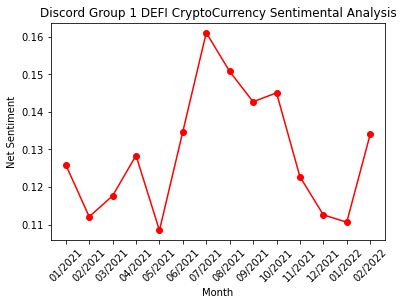

In [20]:
import matplotlib.pyplot as plt

xAxis = []
yAxis = []

for date in timeSplitDataNetScoreGroup1:
    xAxis.append(date)
    yAxis.append(timeSplitDataNetScoreGroup1[date])

plt.plot(xAxis,yAxis, color='red', marker='o')
plt.title('Discord Group 1 DEFI CryptoCurrency Sentimental Analysis')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Net Sentiment')
# plt.grid(True)
plt.show()

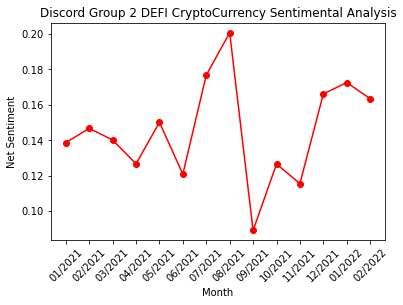

In [22]:
import matplotlib.pyplot as plt

xAxis = []
yAxis = []

for date in timeSplitDataNetScoreGroup2:
    xAxis.append(date)
    yAxis.append(timeSplitDataNetScoreGroup2[date])

plt.plot(xAxis,yAxis, color='red', marker='o')
plt.title('Discord Group 2 DEFI CryptoCurrency Sentimental Analysis')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Net Sentiment')
# plt.grid(True)
plt.show()

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords

# Data loading
df = pd.read_csv(
    "C:/Users/caleb/Documents/tmp/ssa/discordDeFiScrape700.csv", encoding="ISO-8859-1")
df = df.fillna(method='ffill')
# Data Cleaning
stop = stopwords.words('english')

def clean_content(contentInput):
    if type(contentInput) == np.float:
        return ""
    contentInput = contentInput.lower()
    # to avoid removing contractions in english
    contentInput = re.sub("'", "", contentInput)
    contentInput = re.sub("@[A-Za-z0-9_]+", "", contentInput)
    contentInput = re.sub("#[A-Za-z0-9_]+", "", contentInput)
    contentInput = re.sub(r'http\S+', '', contentInput)
    contentInput = re.sub('[()!?]', ' ', contentInput)
    contentInput = re.sub('\[.*?\]', ' ', contentInput)
    contentInput = re.sub("[^a-z0-9]", " ", contentInput)
    contentInput = contentInput.strip()
    contentInput = contentInput.split()
    contentInput = [w for w in contentInput if not w in stop]
    contentInput = " ".join(word for word in contentInput)
    return contentInput

# sentimental model
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()


def getSentiment(startDate, endDate, serverNames):
    monthList = pd.date_range(startDate, endDate,
                              freq='MS').strftime("%m/%Y").tolist()

    timeSplitDataGroup = {}
    timeSplitDataSentimentGroup = {}

    for month in monthList:
        timeSplitDataGroup[month] = []
        timeSplitDataSentimentGroup[month] = []

    for row in df.iterrows():
        # extracting month data from row
        dateData = row[1]['date']
        tmp = dateData.find('/')
        monthData = dateData[tmp+1:]  # removing day e.g '12/'
        if len(monthData) == 6:
            monthData = "0"+monthData

        if monthData in timeSplitDataGroup:  # check if data is in range of date we want to analyli
            content = row[1]['content']
            # cleaning Data
            cleaned = clean_content(content)
            # Storing into time split dict
            if row[1]['serverName'] in serverNames:
                timeSplitDataGroup[monthData].append(cleaned)

    for month in timeSplitDataGroup:
        for content in timeSplitDataGroup[month]:
            output = sid.polarity_scores(content)
            timeSplitDataSentimentGroup[month].append(output)


    # Calculating Net Weighted Sentiment Score
    timeSplitDataNetScoreGroup = {}
    for month in monthList:
        timeSplitDataNetScoreGroup[month] = 0

    for month in timeSplitDataGroup:
        for output in timeSplitDataSentimentGroup[month]:
            compound = output['compound']
            compound = compound / len(timeSplitDataGroup[month])
            timeSplitDataNetScoreGroup[month] += compound

    return timeSplitDataNetScoreGroup

# serverNames
group1Names = ['SushiSwap Community',
               'serverName',
               'Aave Community',
               'r/CrpytoCurrency',
               'Curve Finance',
               'Uniswap']
group2Names = ['Compound']

# ensure data has this date range
startDate = '2021-01-01'
endDate = '2022-03-01'

res = getSentiment(startDate, endDate, group2Names)

import matplotlib.pyplot as plt

xAxis = []
yAxis = []

for date in timeSplitDataNetScoreGroup1:
    xAxis.append(date)
    yAxis.append(res[date])

plt.plot(xAxis,yAxis, color='red', marker='o')
plt.title('Discord Group 1 DEFI CryptoCurrency Sentimental Analysis')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Net Sentiment')
# plt.grid(True)
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\caleb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\caleb\AppData\Local\Temp/ipykernel_8040/4147653207.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(contentInput) == np.float:


KeyError: '02/2022'